<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [2]:
## read in the datafram
df = pd.read_csv("job_listings.csv")
df.head()


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
df.shape

(426, 3)

In [4]:
## inspect first entry in description 
html_doc=df['description'][0]

In [54]:
## run beautiful soup on every row in description column
df['soup'] = [BeautifulSoup(text, 'lxml').text for text in df.description]

In [50]:
## need a function to apply on dataframe 
## this function starts each string a bit later to remove b
## also removes \\n's

def drop_b(text):
    return text[2::].replace('\\n', '')

In [55]:
df.head()

,Unnamed: 0,description,title,soup
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [56]:
## apply the function we wrote earlier on soup
df['soup']= [drop_b(text) for text in df.soup]

In [57]:
df.head()

,Unnamed: 0,description,title,soup
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements:Conceptual understanding in M...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job DescriptionAs a Data Scientist 1, you will..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations2...


## 2) Use Spacy to tokenize the listings 

In [58]:
## upload our model
nlp = spacy.load("en_core_web_lg")

In [60]:
## Tokenization
df['soup_tokens'] = [nlp(text) for text in df.soup]

In [61]:
df.head()

,Unnamed: 0,description,title,soup,soup_tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements:Conceptual understanding in M...,"(Job, Requirements, :, Conceptual, understandi..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job DescriptionAs a Data Scientist 1, you will...","(Job, DescriptionAs, a, Data, Scientist, 1, ,,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"(As, a, Data, Scientist, you, will, be, workin..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","($, 4,969, -, $, 6,756, a, monthContractUnder,..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations2...,"(Location, :, USA, \xe2\x80\x93, multiple, loc..."


In [67]:
## lets remove stop words
## this function will take text and return only those words noot in the stopwords list

def filtered_soup(text):
    filtered_sentence = []
    for word in text:
        if word.is_stop==False:
            filtered_sentence.append(word)
    return filtered_sentence

In [64]:
## run the function on the entire dataframe
df['soup_tokens'] = [filtered_soup(text) for text in df.soup_tokens]

In [66]:
## inspect the results
df['soup_tokens'][0]

[Job,
 Requirements,
 :,
 Conceptual,
 understanding,
 Machine,
 Learning,
 models,
 like,
 Nai\xc2\xa8ve,
 Bayes,
 ,,
 K,
 -,
 Means,
 ,,
 SVM,
 ,,
 Apriori,
 ,,
 Linear/,
 Logistic,
 Regression,
 ,,
 Neural,
 ,,
 Random,
 Forests,
 ,,
 Decision,
 Trees,
 ,,
 K,
 -,
 NN,
 hands,
 -,
 experience,
 2,
 themIntermediate,
 expert,
 level,
 coding,
 skills,
 Python,
 /,
 R.,
 (,
 Ability,
 write,
 functions,
 ,,
 clean,
 efficient,
 data,
 manipulation,
 mandatory,
 role)Exposure,
 packages,
 like,
 NumPy,
 ,,
 SciPy,
 ,,
 Pandas,
 ,,
 Matplotlib,
 etc,
 Python,
 GGPlot2,
 ,,
 dplyr,
 ,,
 tidyR,
 RAbility,
 communicate,
 Model,
 findings,
 Technical,
 Non,
 -,
 Technical,
 stake,
 holdersHands,
 experience,
 SQL,
 /,
 Hive,
 similar,
 programming,
 languageMust,
 past,
 work,
 GitHub,
 ,,
 Kaggle,
 published,
 articleMaster,
 degree,
 Statistics,
 /,
 Mathematics,
 /,
 Computer,
 Science,
 quant,
 specific,
 field,
 .,
 Apply,
 "]

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [68]:
## import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
df['soup_tokens_string'] = df['soup_tokens'].astype(str)

In [97]:
## wow...do not forget to put the input in brackets
## hours lost

def vectorize_and_count(text):
    cv = CountVectorizer()
    cv_fit = cv.fit_transform([text])
    count_list = cv_fit.toarray().sum(axis=0)
    return count_list

In [98]:
## run the function on the entire dataframe
df['count_list'] = [vectorize_and_count(text) for text in df.soup_tokens_string]

In [100]:
df.head()

,Unnamed: 0,description,title,soup,soup_tokens,soup_tokens_string,count_list
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements:Conceptual understanding in M...,"[Job, Requirements, :, Conceptual, understandi...","[Job, Requirements, :, Conceptual, understandi...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job DescriptionAs a Data Scientist 1, you will...","[Job, DescriptionAs, Data, Scientist, 1, ,, he...","[Job, DescriptionAs, Data, Scientist, 1, ,, he...","[1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[Data, Scientist, working, consulting, busines...","[Data, Scientist, working, consulting, busines...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, ..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$, 4,969, -, $, 6,756, monthContractUnder, ge...","[$, 4,969, -, $, 6,756, monthContractUnder, ge...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, ..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations2...,"[Location, :, USA, \xe2\x80\x93, multiple, loc...","[Location, :, USA, \xe2\x80\x93, multiple, loc...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [101]:
soup_token = ''
for i in df['soup_tokens']:
   soup_token += str(i)

In [102]:
from collections import Counter
split_it = soup_token.split()
Counter = Counter(split_it)
most_often = Counter.most_common(20)
print(most_often)

[(',,', 15570), ('.,', 7396), ('data,', 3477), ('-,', 2805), (':,', 1403), ('(,', 1140), ('business,', 1082), ('/,', 1036), ('experience,', 973), ('work,', 930), ('team,', 872), ('Data,', 804), ('),', 757), ('learning,', 745), ('analysis,', 590), ('machine,', 577), ('models,', 561), ('statistical,', 548), ('science,', 520), ('product,', 493)]


In [108]:
most_often = pd.DataFrame(most_often)
most_often

,0,1
0,",,",15570
1,".,",7396
2,"data,",3477
3,"-,",2805
4,":,",1403
5,"(,",1140
6,"business,",1082
7,"/,",1036
8,"experience,",973
9,"work,",930


## 4) Visualize the most common word counts

In [115]:
most_often = most_often.rename(columns={0: "word", 1: "frequency"})

In [116]:
most_often.head()

,word,frequency
0,",,",15570
1,".,",7396
2,"data,",3477
3,"-,",2805
4,":,",1403


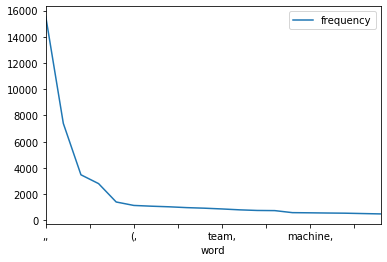

In [119]:
most_often.plot(x='word', y='frequency')

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [120]:
df.head()

,Unnamed: 0,description,title,soup,soup_tokens,soup_tokens_string,count_list
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements:Conceptual understanding in M...,"[Job, Requirements, :, Conceptual, understandi...","[Job, Requirements, :, Conceptual, understandi...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job DescriptionAs a Data Scientist 1, you will...","[Job, DescriptionAs, Data, Scientist, 1, ,, he...","[Job, DescriptionAs, Data, Scientist, 1, ,, he...","[1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[Data, Scientist, working, consulting, busines...","[Data, Scientist, working, consulting, busines...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, ..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$, 4,969, -, $, 6,756, monthContractUnder, ge...","[$, 4,969, -, $, 6,756, monthContractUnder, ge...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, ..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations2...,"[Location, :, USA, \xe2\x80\x93, multiple, loc...","[Location, :, USA, \xe2\x80\x93, multiple, loc...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [121]:
from sklearn.feature_extraction.text import TfidfTransformer

In [124]:
text = df['soup_tokens'][0]

In [122]:
cv=CountVectorizer()

In [127]:
def vectorize_and_tfidf(text):
    cv = CountVectorizer()
    word_count_vector=cv.fit_transform([text])
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)

In [129]:
df['tfidf'] = [vectorize_and_tfidf([text]) for text in df.soup_tokens]

AttributeError: 'list' object has no attribute 'lower'

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 